In [5]:
#%matplotlib notebook
%matplotlib inline
#%config InlineBackend.figure_format='retina'
%config InlineBackend.figure_format = 'svg'

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import os
import pprint
import time
pp = pprint.PrettyPrinter()
matplotlib.rcParams['figure.figsize'] = [11.0, 8.0]


# Uncomment to enable matplotlib-D3.js integration -- enables zooming and panning of figures.
#import mpld3
#mpld3.enable_notebook()

# N-fold IP experiment plotter
``plotter(instance, method, gamma, gc_vals, main_logdir, symlog=True)``

- ``instance`` is a string such that the individual log files have the form ``<instance>_method_<method>_gamma_<gamma>.log``
- ``method`` is ``"ng1"`` or ``"nginfty"``
- ``gamma`` is ``"best"``, ``"logarithmic"`` or ``"unit"``
- ``gc_vals`` is a list of integers of values of g_1 to be plotted
- ``main_logdir`` is a string containing a path such that ``<main_logdir>`` contains a directory for each ``gamma``, and each of these directories contains a directory for each ``method``.
- ``symlog`` is a boolean indicating if the plot should have logarithmic y-axis

In [10]:
def plotter(instance, method, gamma, gc_vals, main_logdir, max_x = None, symlog=True):
    ### Get the data
    cwd = os.getcwd()
    name = instance+"_"+method+"_"+gamma+"_"
    logdir = main_logdir+"/"+gamma+"/"+method+"/"
    def getdata(gc_vals):
        os.chdir(logdir)
        d = defaultdict(list)
        for gc in gc_vals:
            data = open(name+str(gc)+".log", "r")
            for line in data.readlines():
                vals = line.split(" ")
                while "\n" in vals:
                    vals.remove("\n")
                vals = [int(v) for v in vals]
                vals.sort()
                if vals:
                    d[gc].append(vals)
            data.close()
        os.chdir(cwd)
        return d
    
    start=time.time()
    
    d = getdata(gc_vals)
    d_keys = d.keys()
    d_keys.sort()
    if max_x is None:
        max_iter = max(len(d[gc]) for gc in d)
    else:
        max_iter = max_x
    max_obj = max(max(l) for gc in d for l in d[gc])
    min_obj = min(min(l) for gc in d for l in d[gc])
    xs = np.arange(0, max_iter)
    ys = []
    for gc in d_keys:
        y = [[], [], []]
        for i in range(max_iter):
            if i < len(d[gc]):
                y[0].append(min(d[gc][i]))
                ll = d[gc][i]
                #ll = [(item//100)*100 for item in ll]
                y[1].append((ll))
                y[2].append(min(d[gc][i]) + 6*len(ll))
            else:
                y[0].append(min(d[gc][-1]))
                y[1].append([min(d[gc][-1])])
                y[2].append(min(d[gc][-1]))
        ys.append(y)
    
    cmap = plt.get_cmap('jet')


    for (gc,y) in zip(d_keys,ys):
        color = cmap((d_keys.index(gc))/float(len(d_keys)))
        # adding minus one because we always a) write initial obj, b) final obj
        total_iters = sum(len(d[gc][l]) for l in range(len(d[gc]))) - 1
        plt.fill_between(xs, y[0], y[2], color=color, label="g1="+str(gc)+" AugILP: " + str(total_iters))
        #plt.plot(xs, y[0], color=color, label="gc="+str(gc)+" iters: " + str(total_iters))
        #for (x, yy) in zip(xs, y[1]):
        #    for yyy in set(yy):
        #        plt.scatter([x], [yyy], s=5*(yy.count(yyy))**(1.33), color=color) # Those are just dots

    plt.xlabel('iteration')
    plt.ylabel('objective')
    if symlog:
        #plt.yscale('log', subsy=[2, 3, 4, 5, 6, 7, 8, 9], basey=2,nonposy="clip")
        plt.yscale("symlog")
    plt.ylim(min_obj,max_obj+100)

    #plt.title("instance: " + instance + " method: " + method + " gamma: " + gamma)
    
    end = time.time()
    start = time.time()
    plt.legend()
    fig = plt.gcf()
    #mpld3.display(fig)
    #fig.tight_layout()
    #fig.savefig(name[:-1]+".pdf", format="pdf")
    fig.savefig(name[:-1]+".pdf", format='pdf', dpi=1000,bbox_inches="tight")
    #fig.savefig(name[:-1]+".eps", format='eps', dpi=1000,bbox_inches="tight")
    plt.show()


## Results
- [Scheduling, ratio 0.60](#Scheduling,-ratio-0.60)
- [Scheduling, ratio 0.70](#Scheduling,-ratio-0.70)
- [Scheduling, ratio 0.75](#Scheduling,-ratio-0.75)
- [Closest String, binary, 5 strings, length 10000](#Closest-String,-binary,-5-strings,-length-10000)

### Scheduling, ratio 0.60
Parameters are: ``m=15``, ``lengths = [2,3,7,23]``, ``weights = [6,13,2,1]`` ``smallest=1000``, ``largest=5000``, ``slack_r=0.7``.

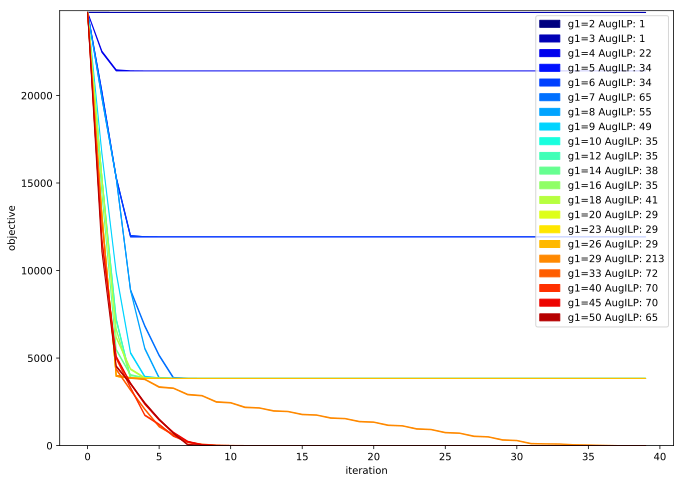

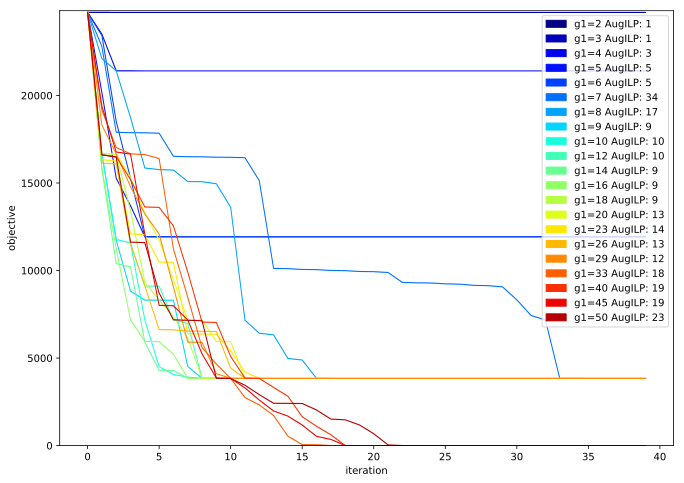

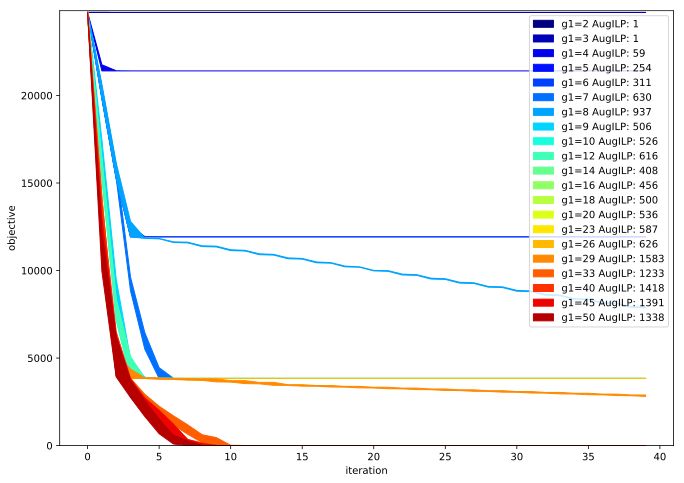

In [14]:
instance="QCmax_m_15_lengths_2_3_7_29_weigths_6_12_2_1_smallest_1000_largest_5000_slack_r_0.60_obj_total_length"
method = "ng1"
logdir = "./sched/logs/g_15_length_r_60/"

gc_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 23, 26, 29, 33, 40, 45, 50]

for gamma in ["logarithmic", "unit", "best"]:
    plotter(instance, method, gamma, gc_vals, logdir, max_x = 40, symlog=False)    

### Scheduling, ratio 0.62
Parameters are: ``m=15``, ``lengths = [2,3,7,23]``, ``weights = [6,13,2,1]`` ``smallest=1000``, ``largest=5000``, ``slack_r=0.62``.

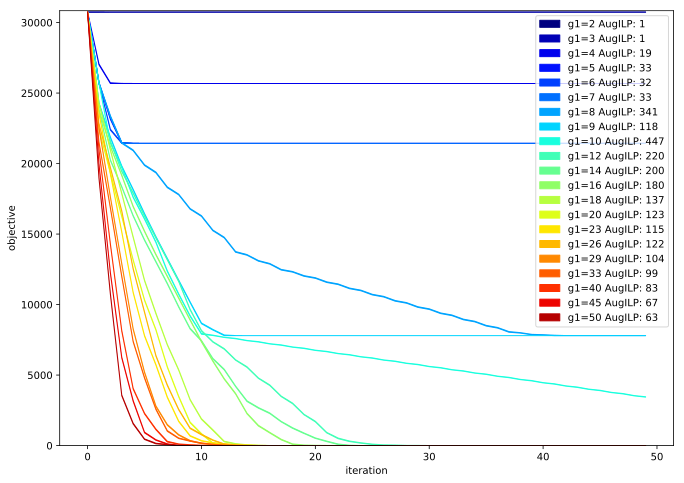

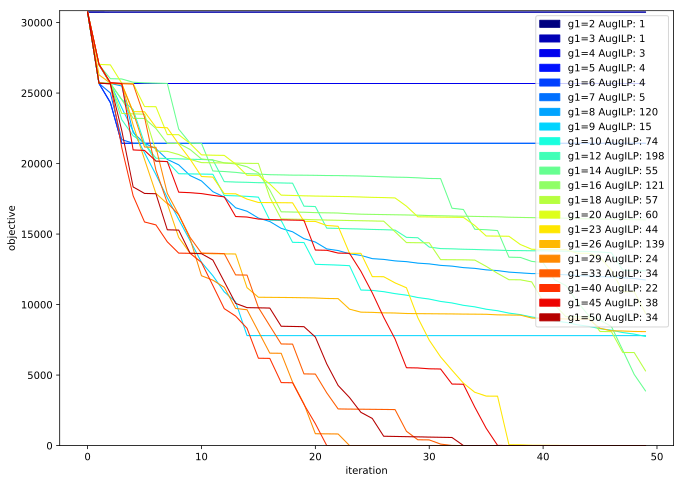

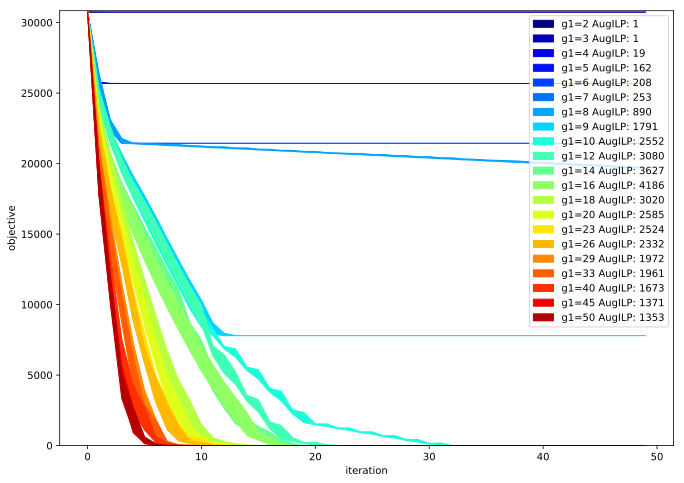

In [15]:
instance="QCmax_m_15_lengths_2_3_7_23_weigths_6_13_2_1_smallest_1000_largest_5000_slack_r_0.62_obj_total_length"
method = "ng1"
logdir = "./sched/logs/g_15_length_r_62/"

gc_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 23, 26, 29, 33, 40, 45, 50]

for gamma in ["logarithmic", "unit", "best"]:
    plotter(instance, method, gamma, gc_vals, logdir, max_x=50,symlog=False)    

### Scheduling, ratio 0.70
Parameters are: ``m=15``, ``lengths = [2,3,7,23]``, ``weights = [6,13,2,1]`` ``smallest=1000``, ``largest=5000``, ``slack_r=0.7``.

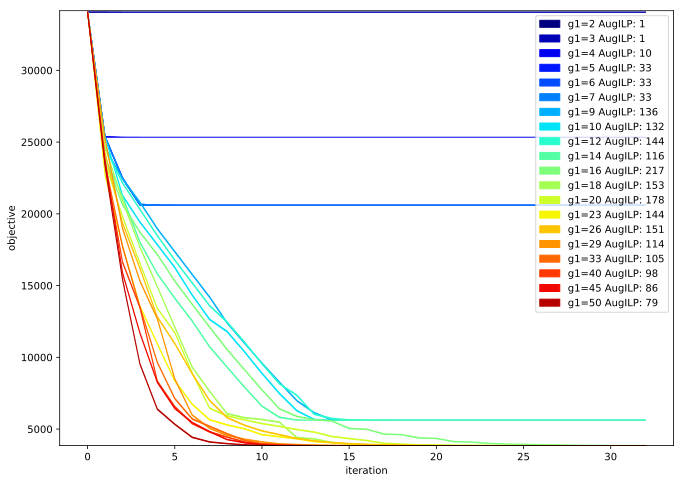

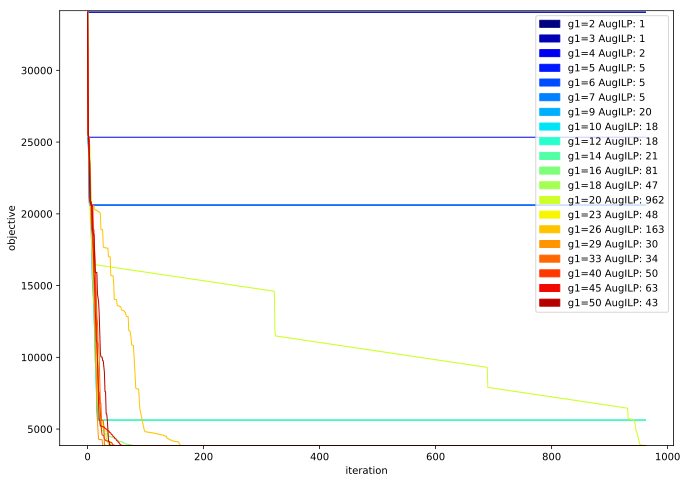

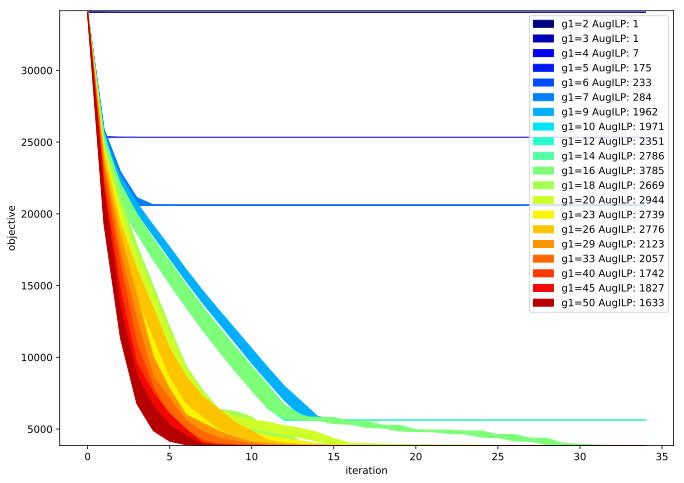

In [16]:
instance="QCmax_m_15_lengths_2_3_7_23_weigths_6_13_2_1_smallest_1000_largest_5000_slack_r_0.70_obj_total_length"
method = "ng1"
logdir = "./sched/logs/g_15_length_r_70/"

gc_vals = [2, 3, 4, 5, 6, 7, 9, 10, 12, 14, 16, 18, 20, 23, 26, 29, 33, 40, 45, 50]

for gamma in ["logarithmic", "unit", "best"]:
    plotter(instance, method, gamma, gc_vals, logdir,symlog=False)    

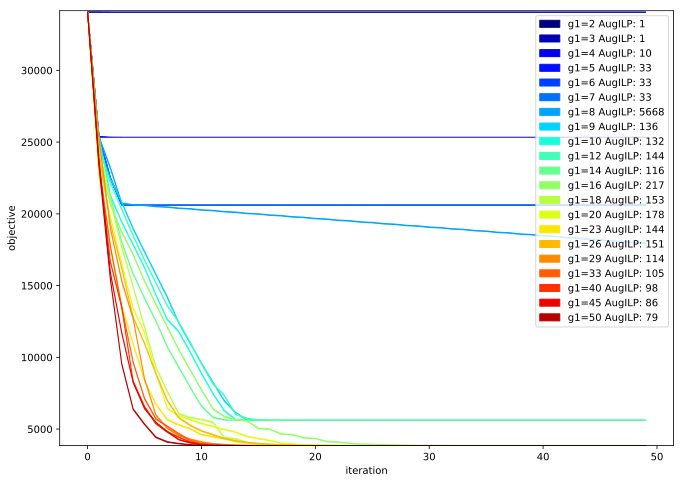

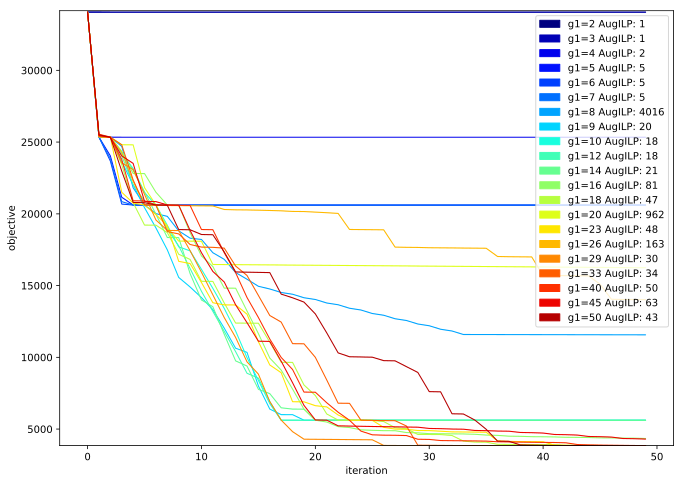

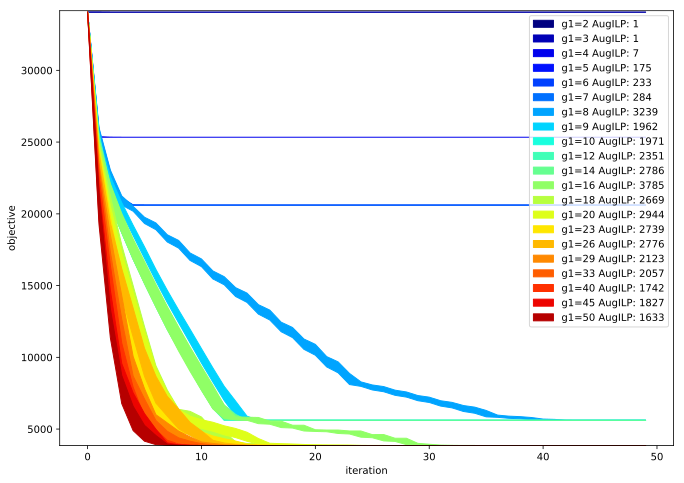

In [17]:
instance="QCmax_m_15_lengths_2_3_7_23_weigths_6_13_2_1_smallest_1000_largest_5000_slack_r_0.70_obj_total_length"
method = "ng1"
logdir = "./sched/logs/g_15_length_r_70/"

gc_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 23, 26, 29, 33, 40, 45, 50]

for gamma in ["logarithmic", "unit", "best"]:
    plotter(instance, method, gamma, gc_vals, logdir,max_x=50,symlog=False)    

### Scheduling, ratio 0.75
Parameters are: ``m=15``, ``lengths = [2,3,7,23]``, ``weights = [6,13,2,1]`` ``smallest=1000``, ``largest=5000``, ``slack_r=0.75``.

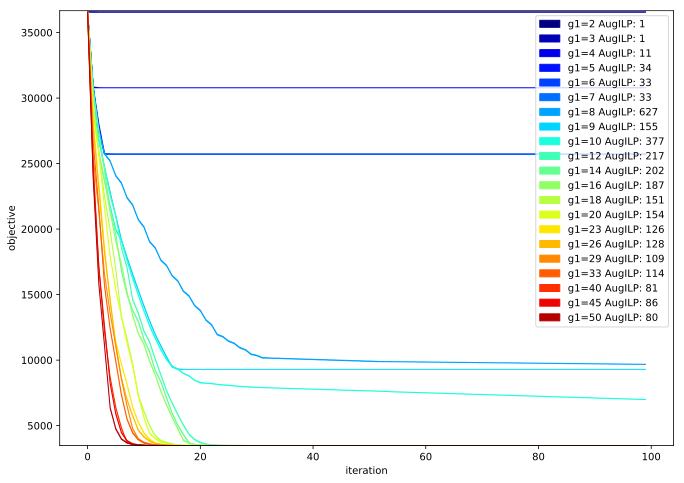

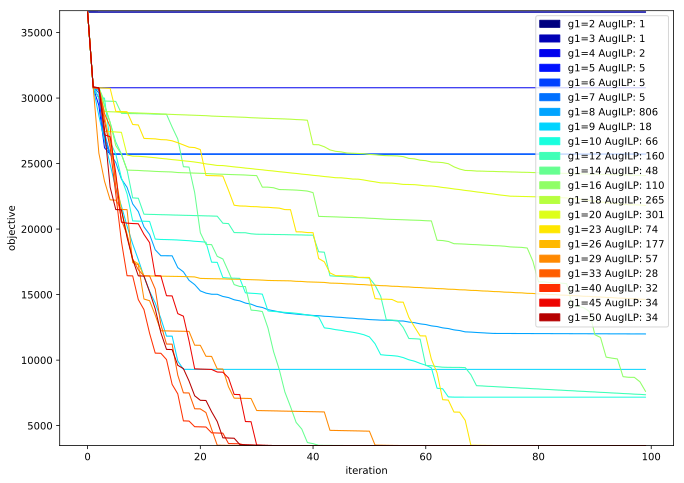

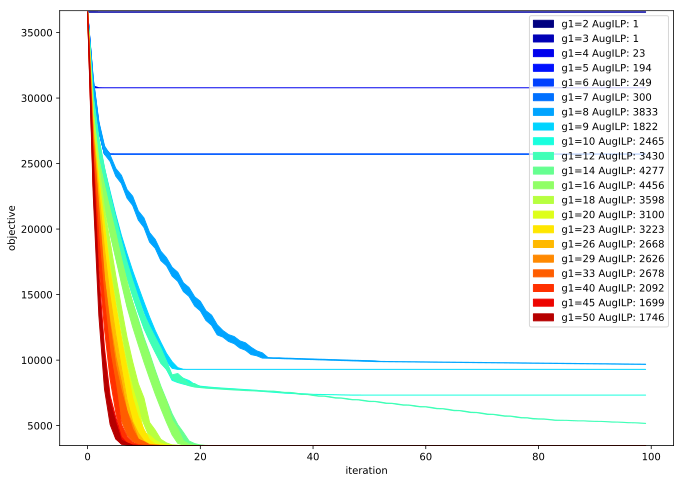

In [19]:
instance="QCmax_m_15_lengths_2_3_7_23_weigths_6_13_2_1_smallest_1000_largest_5000_slack_r_0.75_obj_total_length"
method = "ng1"
logdir = "./sched/logs/g_15_length_r_75/"

gc_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 23, 26, 29, 33, 40, 45, 50]

for gamma in ["logarithmic", "unit", "best"]:
    plotter(instance, method, gamma, gc_vals, logdir, max_x = 100,symlog=False)    

### Closest String, binary, 5 strings, length 10000
Parameters are: ``k=5``, ``|$\Sigma$|=2``, ``L=10000``, ``r=1``.

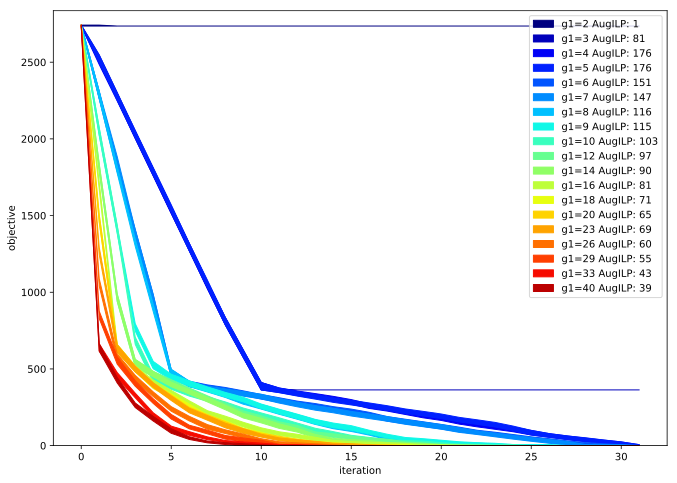

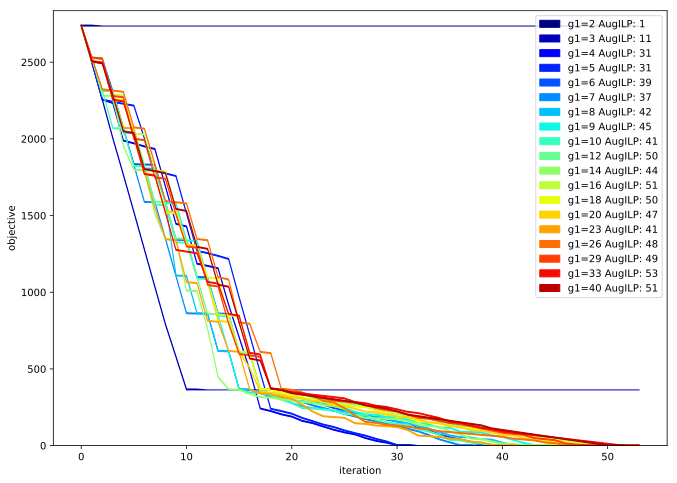

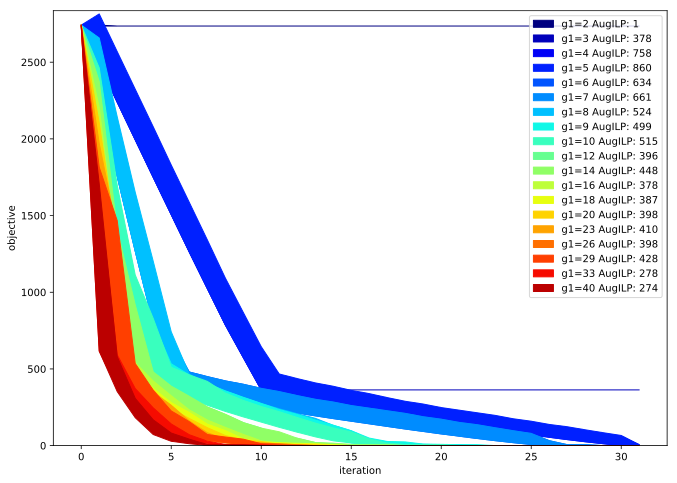

In [18]:
instance="2-5-10000-1-1.csp"
method = "ng1"
logdir = "./csp/2-5-10000-1-1_logs"

gc_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 23, 26, 29, 33, 40]

for gamma in ["logarithmic", "unit", "best"]:
    plotter(instance, method, gamma, gc_vals, logdir,symlog=False)  